In [1]:
# pip install -U scikit-learn

In [2]:
# pip install --upgrade pip
# !pip install SVM
# !pip install nltk
# !pip install nltk.corpus.stopwords

In [3]:
import pandas as pd
import xgboost as xgb
import numpy as np
import re
import string 
import sklearn.feature_extraction.text as text
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report
import nltk #a powerful library for working with human language data
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords #for cleaning 
from nltk.stem import LancasterStemmer ##for cleaning 
from sklearn import metrics
import seaborn as sns 
from sklearn.svm import SVC
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\coolp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\coolp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
with open("train_data.txt", "r", encoding="utf-8") as file:
    content = file.read()

In [5]:
# Split the text content by lines
lines = content.strip().split("\n")

# Process each line and extract the required fields
data = []
for line in lines:
    parts = line.split(":::")
    title_id = parts[0].strip()
    title = parts[1].strip()
    title = title.split(" (")[0]
    title = title.replace('"', '')
    genre = parts[2].strip()
    description = parts[3].strip()
    
    # Append the extracted data to the list
    data.append({
        "ID": title_id,
        "TITLE": title,
        "GENRE": genre,
        "DESCRIPTION": description
    })

df = pd.DataFrame(data)
print(df.head(20))

    ID                                      TITLE        GENRE  \
0    1                      Oscar et la dame rose        drama   
1    2                                      Cupid     thriller   
2    3                  Young, Wild and Wonderful        adult   
3    4                             The Secret Sin        drama   
4    5                            The Unrecovered        drama   
5    6                            Quality Control  documentary   
6    7                                  Pink Slip       comedy   
7    8                              One Step Away        crime   
8    9                            Desperate Hours   reality-tv   
9   10                                    Spirits       horror   
10  11                    The Spirit World: Ghana  documentary   
11  12                            In the Gloaming        drama   
12  13               Pink Ribbons: One Small Step  documentary   
13  14                                Interrabang     thriller   
14  15    

In [6]:
# print(df.shape)
st = set(df['GENRE'].to_numpy())
print(st)

{'family', 'horror', 'biography', 'documentary', 'talk-show', 'romance', 'crime', 'fantasy', 'mystery', 'musical', 'sci-fi', 'action', 'animation', 'drama', 'war', 'history', 'short', 'western', 'adventure', 'news', 'sport', 'comedy', 'thriller', 'adult', 'music', 'game-show', 'reality-tv'}


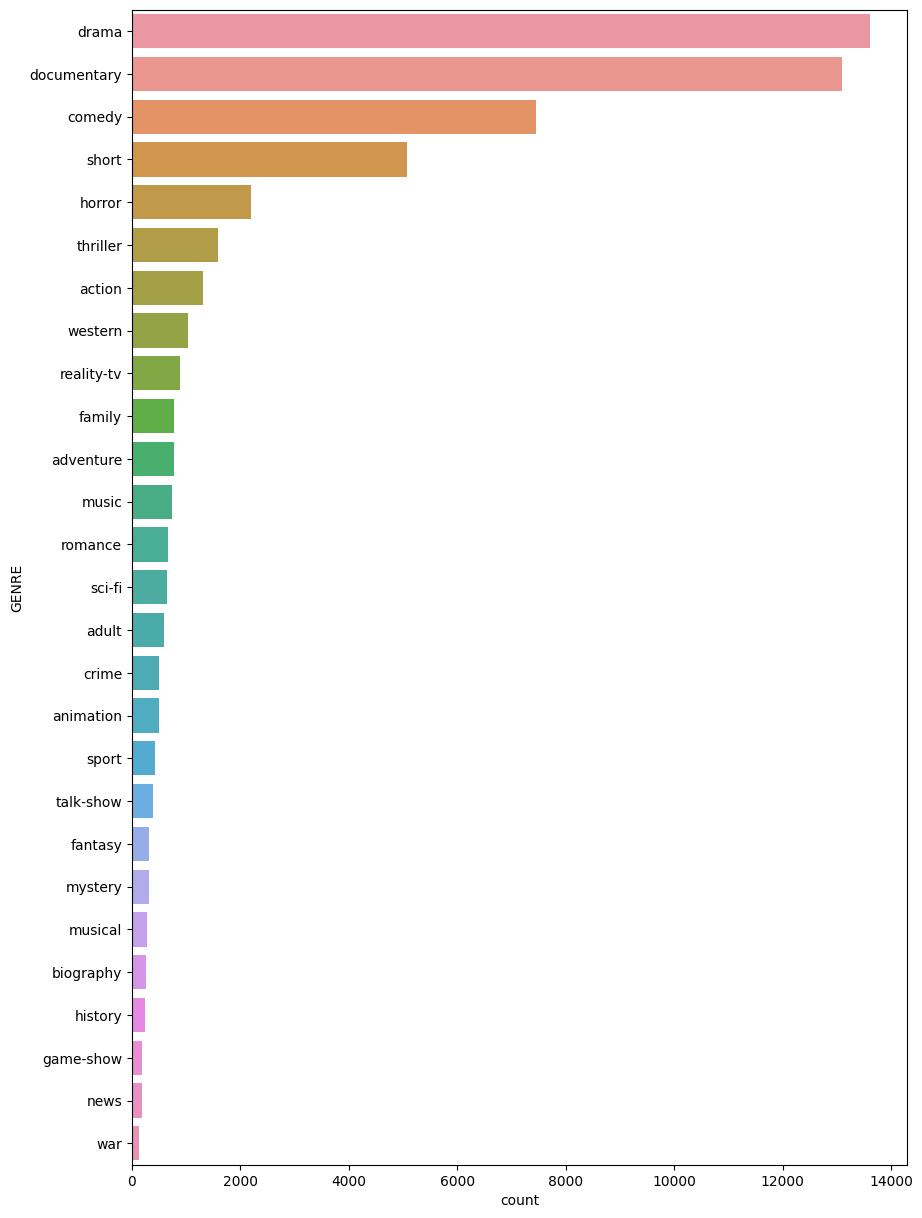

In [7]:
plt.figure(figsize=(10,15))
sns.countplot(data=df, y="GENRE", order= df["GENRE"].value_counts().index)
plt.show()

In [8]:
genres = df['GENRE'].unique()
# Create a mapping dictionary
mp = {genre: i for i, genre in enumerate(genres)}

# Map the 'GENRE' column
df['GENRE'] = df['GENRE'].map(mp)

In [9]:
print(df.head(20))

    ID                                      TITLE  GENRE  \
0    1                      Oscar et la dame rose      0   
1    2                                      Cupid      1   
2    3                  Young, Wild and Wonderful      2   
3    4                             The Secret Sin      0   
4    5                            The Unrecovered      0   
5    6                            Quality Control      3   
6    7                                  Pink Slip      4   
7    8                              One Step Away      5   
8    9                            Desperate Hours      6   
9   10                                    Spirits      7   
10  11                    The Spirit World: Ghana      3   
11  12                            In the Gloaming      0   
12  13               Pink Ribbons: One Small Step      3   
13  14                                Interrabang      1   
14  15                        The Glass Menagerie      0   
15  16                                 N

In [10]:
df['TEXT'] = df['TITLE'] + ' ' + df['DESCRIPTION']

In [11]:
y = df.GENRE

In [12]:
with open("test_data.txt", "r", encoding="utf-8") as file:
    content2 = file.read()

lines2 = content2.strip().split("\n")

dt = []
for line in lines2:
    parts = line.split(":::")
    title_id = parts[0].strip()
    title = parts[1].strip()
    title = title.split(" (")[0]
    title = title.replace('"', '')
    description = parts[2].strip()
    
    dt.append({
        "ID": title_id,
        "TITLE": title,
        "DESCRIPTION": description
    })

dfm = pd.DataFrame(dt)
dfm['TEXT'] = dfm['TITLE'] + ' ' + dfm['DESCRIPTION']

In [32]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))  # Stopwords set

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text) 
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)  # Change to replace non-characters with a space
    text = "".join([i for i in text if i not in string.punctuation])
    text = re.sub(r'\d+', '', text)  # Remove numeric characters
    words = nltk.word_tokenize(text)
    # Use the predefined stop_words variable instead of redefining it inside the function
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    return text

x_cleaned = df['TEXT'].apply(cleaning_data)
X_test_cleaned = dfm['TEXT'].apply(cleaning_data)

In [17]:
vectorizer = text.TfidfVectorizer()
x_tr = vectorizer.fit_transform(x_cleaned)
x_train, x_test, y_train, y_test = train_test_split(x_tr, y, test_size=0.2, random_state=42)

In [18]:
ncf = MultinomialNB()
ncf.fit(x_train, y_train)

# Make predictions on the test set
y_pred_1 = ncf.predict(x_test)
print(f"Model score: {ncf.score(x_train, y_train)}")

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Computing R^2 score
r2 = r2_score(y_test, y_pred_1)
print(f'R^2 Score: {r2:.4f}')

# Computing RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_1))
print(f'RMSE: {rmse:.4f}')

Model score: 0.4701989808858454
Accuracy: 44.54%
R^2 Score: -0.5430
RMSE: 7.4043


In [19]:
# Initialize and train the XGBoost classifier
xg = xgb.XGBClassifier()
xg.fit(x_train, y_train)

# Make predictions on the test set
y_pred_2 = xg.predict(x_test)
print(f"Model score: {xg.score(x_train, y_train)}")

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Computing R^2 score
r2 = r2_score(y_test, y_pred_2)
print(f'R^2 Score: {r2:.4f}')

# Computing RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_2))
print(f'RMSE: {rmse:.4f}')


Model score: 0.7845334440063637
Accuracy: 55.22%
R^2 Score: -0.1635
RMSE: 6.4298


In [20]:
# Train a Support vector classifier
# clf = SVC()
# clf.fit(x_train, y_train)

# # Evaluate the model
# y_pred_3 = clf.predict(x_test)
# print(f"Model score: {clf.score(x_train, y_train)}")

# # print("Classification Report:")
# # print(classification_report(y_test, y_pred))
# print(f"test: {y_test},pred{y_pred_3}")

# # Computing R^2 score
# r2 = r2_score(y_test, y_pred_3)
# print(f'R^2 Score: {r2:.4f}')

# # Computing RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_pred_3))
# print(f'RMSE: {rmse:.4f}')